In [1]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import re
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import gensim
from sklearn.model_selection import train_test_split
import spacy
from sklearn.decomposition import NMF, LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from pprint import pprint
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, accuracy_score,roc_auc_score
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import keras
print('Done')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/suneherahasib/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2023-05-15 18:31:00.975300: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Done


In [8]:
data = pd.read_csv('tweets4f.csv', usecols=['text'])

In [4]:
from nltk.stem import SnowballStemmer
from gensim.models.phrases import Phrases, Phraser

In [9]:
summary_stats = data.describe()
print(summary_stats)

                                                     text
count                                                7627
unique                                               4580
top      Have you thought about getting help? #mentalh...
freq                                                   22


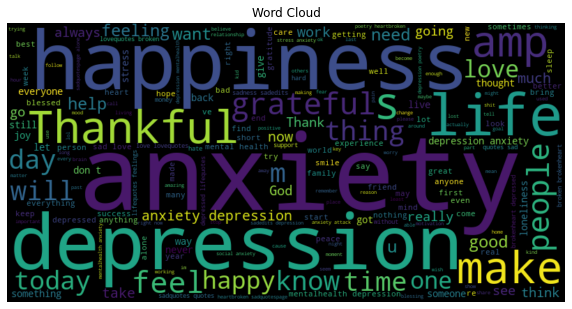

In [13]:
wordcloud = WordCloud(width=800, height=400).generate(' '.join(data['text']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of the most frequently occurring words')
plt.show()


KeyError: 'tweet_id'

In [15]:

from gensim.models import Word2Vec
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

In [16]:
from sklearn.decomposition import TruncatedSVD

In [17]:

# Load the dataset
data = pd.read_csv('tweets4f.csv', usecols=['text'])

# Function to remove URLs from text
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

# Apply the remove_urls function to the 'text' column
data['text'] = data['text'].apply(remove_urls)

# Function to remove emails, new line characters, and distracting single quotes from text
def preprocess_text(text):
    text = re.sub('\S*@\S*\s?', '', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub("\'", "", text)
    text = re.sub(r'[^\w\s]+', '', text)
    return text

# Apply the preprocess_text function to the 'text' column
data['text'] = data['text'].apply(preprocess_text)

# Function to calculate the sentiment polarity of each tweet
def get_sentiment_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Add a new column to the dataframe with the sentiment polarity of each tweet
data['sentiment_polarity'] = data['text'].apply(get_sentiment_polarity)

# Function to count the frequency of certain words or phrases in the text
def count_words(text, words):
    count = 0
    for word in words:
        count += text.count(word)
    return count

# List of words or phrases associated with anxiety or depression
anxiety_depression_words = ['anxious', 'nervous', 'worried', 'stressed', 'overwhelmed', 'panic', 'fear', 'anxiety','depressed', 'sad', 'unhappy', 'down', 'hopeless', 'helpless', 'worthless', 'suicidal']

# Add new columns to the dataframe with the frequency of anxiety and depression words in each tweet
data['anxiety_depression_word_count'] = data['text'].apply(lambda x: count_words(x, anxiety_depression_words))

# Function to tokenize text
def tokenize(text):
    return nltk.word_tokenize(text.lower())

# Apply the tokenize function to the 'text' column
data['text_tokenized'] = data['text'].apply(tokenize)

# Function to remove stop words
def remove_stopwords(text):
    return [word for word in text if word.lower() not in stopwords.words('english')]

# Remove stop words
data['text_nostops'] = data['text_tokenized'].apply(remove_stopwords)

# Create bigram and trigram models
bigram = gensim.models.Phrases(data['text_nostops'], min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data['text_nostops']], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Function to get bigrams and trigrams
def make_bigrams(text):
    return bigram_mod[text]

def make_trigrams(text):
    return trigram_mod[bigram_mod[text]]

# Apply bigram and trigram models
# Apply bigram and trigram models
data['text_bigrams'] = data['text_nostops'].apply(make_bigrams)
data['text_trigrams'] = data['text_bigrams'].apply(make_trigrams)





In [18]:
# Load spacy 'en' model
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Function to lemmatize text
def lemmatize(text, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    doc = nlp(' '.join(text))
    return [token.lemma_ for token in doc if token.pos_ in allowed_postags]

# Lemmatize text
data['text_lemmatized'] = data['text_trigrams'].apply(lemmatize)

# Create a list of tokenized and lemmatized tweets
tokenized_tweets = data['text_lemmatized'].tolist()

# Train a Word2Vec model on the tokenized tweets to create word embeddings
model = Word2Vec(tokenized_tweets, vector_size=100, window=5, min_count=5, workers=4)

# Function to calculate the average word embedding of each tweet
def get_average_embedding(text):
    # Tokenize the text
    tokens = text
    
    # Get the word vectors for each token
    embeddings = []
    for word in tokens:
        if word in model.wv:
            embeddings.append(model.wv[word])
            
    # If no word vectors are found, return a vector of zeros
    if not embeddings:
        return [0] * 100
    
    # Calculate the average embedding
    avg_embedding = np.mean(embeddings, axis=0)
    
    return avg_embedding.tolist()

In [133]:
data['avg_embedding'] = data['text_lemmatized'].apply(get_average_embedding)

# Convert the dataframe to a dataset


In [134]:
data

,text,sentiment_polarity,anxiety_depression_word_count,text_tokenized,text_nostops,text_bigrams,text_trigrams,text_lemmatized,avg_embedding
0,Maybe the disasters wont end But you CAN get t...,-0.051042,1,"[maybe, the, disasters, wont, end, but, you, c...","[maybe, disasters, wont, end, get, little, lig...","[maybe, disasters, wont, end, get, little, lig...","[maybe, disasters, wont, end, get, little, lig...","[maybe, disaster, end, get, little, light, hop...","[-0.20486783981323242, 0.3196227252483368, 0.0..."
1,i wish i didnt have social anxiety bc the thin...,0.033333,1,"[i, wish, i, didnt, have, social, anxiety, bc,...","[wish, didnt, social, anxiety, bc, things, wou...","[wish, didnt, social, anxiety, bc, things, wou...","[wish, didnt, social, anxiety, bc, things, wou...","[wish, social, anxiety, thing, become, actor]","[-0.20328933000564575, 0.33948445320129395, 0...."
2,𝐼 𝓇𝑒𝒶𝓁𝒾𝓏𝑒 𝓉𝒽𝒶𝓉 happiness has been 𝐢𝐧𝐬𝐢𝐝𝐞 𝐨𝐟 𝐦𝐞...,0.700000,0,"[𝐼, 𝓇𝑒𝒶𝓁𝒾𝓏𝑒, 𝓉𝒽𝒶𝓉, happiness, has, been, 𝐢𝐧𝐬𝐢𝐝...","[𝐼, 𝓇𝑒𝒶𝓁𝒾𝓏𝑒, 𝓉𝒽𝒶𝓉, happiness, 𝐢𝐧𝐬𝐢𝐝𝐞, 𝐨𝐟, 𝐦𝐞, ...","[𝐼, 𝓇𝑒𝒶𝓁𝒾𝓏𝑒, 𝓉𝒽𝒶𝓉, happiness, 𝐢𝐧𝐬𝐢𝐝𝐞, 𝐨𝐟, 𝐦𝐞, ...","[𝐼, 𝓇𝑒𝒶𝓁𝒾𝓏𝑒, 𝓉𝒽𝒶𝓉, happiness, 𝐢𝐧𝐬𝐢𝐝𝐞, 𝐨𝐟, 𝐦𝐞, ...","[𝓇𝑒𝒶𝓁𝒾𝓏𝑒, 𝓉𝒽𝒶𝓉, happiness, 𝐢𝐧𝐬𝐢𝐝𝐞, 𝐨𝐟, time, 𝐡...","[-0.22675243020057678, 0.39947497844696045, 0...."
3,We understand this feeling CFS Fibromyalgia A...,0.000000,0,"[we, understand, this, feeling, cfs, fibromyal...","[understand, feeling, cfs, fibromyalgia, anxie...","[understand, feeling, cfs, fibromyalgia, anxie...","[understand, feeling, cfs, fibromyalgia, anxie...","[understand, feel, fibromyalgia, anxiety, depr...","[-0.22589170932769775, 0.3330965042114258, 0.0..."
4,i am so grateful because things are always wor...,0.000000,0,"[i, am, so, grateful, because, things, are, al...","[grateful, things, always, working]","[grateful, things, always, working]","[grateful, things, always, working]","[grateful, thing, always, work]","[-0.20918336510658264, 0.38938531279563904, 0...."
...,...,...,...,...,...,...,...,...,...
7622,Thank You Jesus for dying for me HolyWeek Holy...,0.000000,0,"[thank, you, jesus, for, dying, for, me, holyw...","[thank, jesus, dying, holyweek, holyweek2023, ...","[thank, jesus, dying, holyweek, holyweek2023, ...","[thank, jesus, dying, holyweek, holyweek2023, ...","[thank, die, holyweek, eastervigil, eastersatu...","[-0.1849544793367386, 0.3505827486515045, 0.05..."
7623,Depression how do you feel when you lose all...,0.200000,0,"[depression, how, do, you, feel, when, you, lo...","[depression, feel, lose, one, hour, much, bear]","[depression, feel, lose, one, hour, much, bear]","[depression, feel, lose, one, hour, much, bear]","[depression, feel, lose, hour, much, bear]","[-0.2249915599822998, 0.344861775636673, 0.051..."
7624,I have no reason to live Im going to hurt some...,0.136364,0,"[i, have, no, reason, to, live, im, going, to,...","[reason, live, im, going, hurt, someone, depre...","[reason, live, im, going, hurt_someone, depres...","[reason, live, im, going, hurt_someone, depres...","[reason, live, m, go, depression]","[-0.2504347860813141, 0.3863452672958374, 0.06..."
7625,True happiness comes from within its not abou...,0.437500,0,"[true, happiness, comes, from, within, its, no...","[true, happiness, comes, within, everything, c...","[true, happiness, comes, within, everything, c...","[true, happiness, comes, within, everything, c...","[true, happiness, come, content, appreciate, s...","[-0.1694735884666443, 0.3252052664756775, 0.03..."


In [142]:
# Calculating word count
data['word_count'] = data['text_nostops'].apply(lambda x: len(x))

# Calculating correlation
correlation = np.corrcoef(data['word_count'], data['sentiment_polarity'])[0, 1]

# Printing the correlation coefficient
print(f"Correlation between word count and sentiment polarity: {correlation}")


Correlation between word count and sentiment polarity: -0.008966257229496191


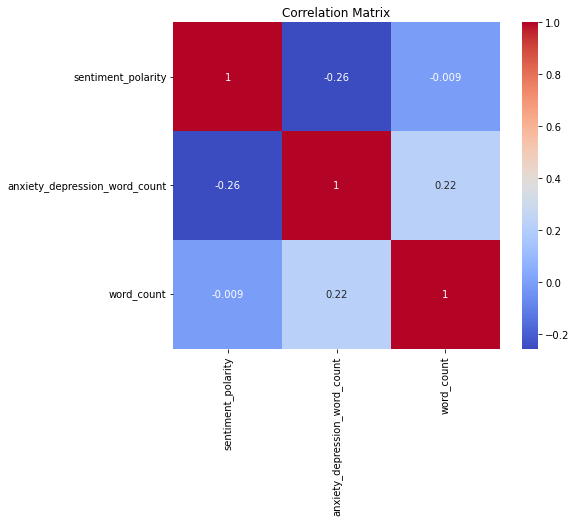

In [143]:
# Select the columns of interest
columns_of_interest = ['sentiment_polarity', 'anxiety_depression_word_count','word_count']

# Create a correlation matrix
corr_matrix = data[columns_of_interest].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

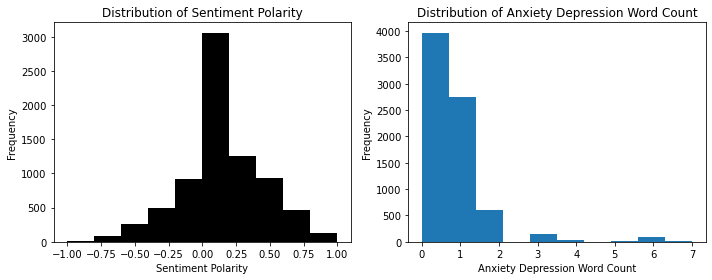

In [150]:
import matplotlib.pyplot as plt
import pandas as pd

## Assuming you have a DataFrame called 'data' containing the numerical columns
sentiment_polarity = data['sentiment_polarity']
anxiety_depression_word_count = data['anxiety_depression_word_count']

colors = ''

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot histogram for sentiment polarity
axes[0].hist(sentiment_polarity, bins=10, color = 'black')
axes[0].set_xlabel('Sentiment Polarity')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Sentiment Polarity')

# Plot histogram for anxiety depression word count
axes[1].hist(anxiety_depression_word_count, bins=10)
axes[1].set_xlabel('Anxiety Depression Word Count')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Anxiety Depression Word Count')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [21]:
data_lemmatized = data['text_lemmatized'].copy()

In [87]:
dataset = []
for i in range(len(data_lemmatized)):
    dataset.append(" ".join(data_lemmatized[i]))
dataset = pd.Series(dataset)


In [88]:
dataset

0       maybe disaster end get little light hope s sti...
1                  wish social anxiety thing become actor
2       𝓇𝑒𝒶𝓁𝒾𝓏𝑒 𝓉𝒽𝒶𝓉 happiness 𝐢𝐧𝐬𝐢𝐝𝐞 𝐨𝐟 time 𝐡𝐚𝐝 𝐜𝐡𝐚𝐧...
3         understand feel fibromyalgia anxiety depression
4                              grateful thing always work
                              ...                        
7622    thank die holyweek eastervigil eastersaturday ...
7623                  depression feel lose hour much bear
7624                          reason live m go depression
7625    true happiness come content appreciate simple ...
7626    phase life listen music listen people bullshit...
Length: 7627, dtype: object

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [90]:
no_features = 5000
no_topics = 2

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=no_features)
tfidf = tfidf_vectorizer.fit_transform(dataset)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(min_df=0.05,max_features=no_features)
tf = tf_vectorizer.fit_transform(dataset)
tf_feature_names = tf_vectorizer.get_feature_names()


In [91]:
# Run NMF
# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5,max_iter=10000).fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

# Fit and transform data
lda.fit_transform(tfidf)


array([[0.15084346, 0.84915654],
       [0.38435907, 0.61564093],
       [0.77807512, 0.22192488],
       ...,
       [0.16338275, 0.83661725],
       [0.8933956 , 0.1066044 ],
       [0.17010399, 0.82989601]])

In [92]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        top_words = []
        for i in topic.argsort()[::-1]:
            feature = feature_names[i]
            if any(word in feature for word in top_words):
                continue
            top_words.append(feature)
            if len(top_words) == no_top_words:
                break
        print(", ".join(top_words))

no_top_words = 25
print('NMF')
display_topics(nmf, tfidf_feature_names, no_top_words)
print('LDA')
display_topics(lda, tfidf_feature_names, no_top_words)




NMF
Topic 0:
anxiety, depression, get, feel, go, give, mentalhealth, help, know, stress, take, social, think, people, need, really, bad, time, attack, work, want, amp, make, much, try
Topic 1:
happiness, grateful, thankful, life, love, happy, day, good, make, thing, thank, bless, time, gratitude, joy, people, live, get, feel, success, let, positivity, take, amp, moment
LDA
Topic 0:
happiness, thankful, grateful, anxiety, life, day, make, love, go, time, feel, get, happy, thing, thank, bless, want, know, come, never, depressed, need, people, work, say
Topic 1:
anxiety, depression, help, mentalhealth, get, stress, people, feel, social, think, give, amp, take, sleep, use, right, know, struggle, much, suffer, really, disorder, wait, many, call


In [95]:
df = pd.read_csv('tweets4f.csv')

# Function to clean the text of each tweet
def clean_tweet_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Clean the text of each tweet in the dataframe
df['text'] = df['text'].apply(clean_tweet_text)

# Save the cleaned dataframe to a new CSV file
df.to_csv('tweets5f.csv', index=False)
#This code will remove URLs, mentions, hashtags, non-alphabetic characters, and extra spaces from the text of each tweet in the text column of the tweets4f.csv file. The cleaned dataframe will then be saved to a new CSV file named cleaned_tweets4f.csv which can be used for further analysis.








In [96]:
nmf_output = nmf.transform(tfidf)
# column names
topicnames = ['Topic' + str(i) for i in range(nmf.n_components)]
# index names
docnames = ['Doc' + str(i) for i in range(len(dataset))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(nmf_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

df_document_topics = df_document_topic
dataset1 = pd.read_csv('tweets5f.csv')
df_document_topics.reset_index(inplace=True,drop=True)
dataset1['label'] = df_document_topics['dominant_topic']

In [97]:
for i in range(20):
    print(dataset1[dataset1['label']==0].iloc[i][1])
    print('\n')

maybe the disasters wont end but you can get through them for that little light of hope thats still there in you i know it is i promise it is it might be small maybe even hidden but i promise you its there


i wish i didnt have social anxiety bc the things i would do to become an actor


we understand this feeling


i like having an empty mind no or i like and


hunger is like being hungry in the least hungry way possible you know wanting food without having to eat it does that make sense anyways my cat is extremely sick right now so if im not avoiding twitter im crying see you soon with an unwanted update


dear brothers is real but together we can prevent it with


back in america


both vague and anxiety inducing that said thank you for sharing what you can


fankoo for sharing this today i feel utterly alone often amp this reminded me im not


have you thought about getting help


i want to die im going to hurt someone


mama is triggering my anxiety


is something that is an outsi

In [98]:
tweets = np.array(dataset1['text'])
labels = np.array(dataset1['label'])
print(len(tweets),len(labels))

7627 7627


In [ ]:
combined_df = pd.concat(tweets,labels, data['sentiment_polarity'], data['avg_embedding'], axis=1)

In [103]:
combined_df

,text,sentiment_polarity,avg_embedding
0,maybe the disasters wont end but you can get t...,-0.051042,"[-0.20486783981323242, 0.3196227252483368, 0.0..."
1,i wish i didnt have social anxiety bc the thin...,0.033333,"[-0.20328933000564575, 0.33948445320129395, 0...."
2,has been all this time i just the way i think,0.700000,"[-0.22675243020057678, 0.39947497844696045, 0...."
3,we understand this feeling,0.000000,"[-0.22589170932769775, 0.3330965042114258, 0.0..."
4,i am so grateful because things are always wor...,0.000000,"[-0.20918336510658264, 0.38938531279563904, 0...."
...,...,...,...
7622,thank you jesus for dying for me,0.000000,"[-0.1849544793367386, 0.3505827486515045, 0.05..."
7623,how do you feel when you lose all you have in ...,0.200000,"[-0.2249915599822998, 0.344861775636673, 0.051..."
7624,i have no reason to live im going to hurt someone,0.136364,"[-0.2504347860813141, 0.3863452672958374, 0.06..."
7625,true happiness comes from within its not about...,0.437500,"[-0.1694735884666443, 0.3252052664756775, 0.03..."


In [114]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from sklearn.model_selection import train_test_split

max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(combined_df['text'])
sequences = tokenizer.texts_to_sequences(combined_df['text'])
tweets = pad_sequences(sequences, maxlen=max_len)




In [115]:
X = np.hstack((tweets, combined_df['sentiment_polarity'].values.reshape(-1, 1), np.vstack(combined_df['avg_embedding']).reshape(-1, max_len)))
y = labels


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train, X_train.shape, y_train.shape)
print(X_test, X_test.shape, y_test.shape)
print(len(X_train), len(X_test), len(y_train), len(y_test))


[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.33558044e-01
   6.88935965e-02 -9.87442285e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.98502922e-01
   2.94324178e-02 -1.48369417e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.90382713e-01
   4.33304161e-02 -1.03011243e-01]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -3.37470055e-01
   3.54844937e-03 -1.35665104e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.71055907e-01
   6.49389252e-02 -1.35635316e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -3.17207187e-01
   1.66998056e-04 -1.28679067e-01]] (6101, 201) (6101,)
[[ 0.          0.          0.         ... -0.43220571 -0.06090671
  -0.06995188]
 [ 0.          0.          0.         ... -0.26095751  0.01494693
  -0.08021549]
 [ 0.          0.          0.         ... -0.3275747   0.08771864
  -0.17685671]
 ...
 [ 0.          0.          0.         ... -0.29101047  0.02879699
  -0.11447401]
 [ 0.          

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Train a logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print(f"Logistic Regression Accuracy: {lr_acc}")

# Train a decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_acc}")

# Train a random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_acc}")



Logistic Regression Accuracy: 0.6225425950196593
Decision Tree Accuracy: 0.9809960681520314
Random Forest Accuracy: 0.991480996068152


In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# create the logistic regression model
lr_model = RandomForestClassifier()

# perform k-fold cross-validation and get the accuracy scores
scores = cross_val_score(lr_model, X_train, y_train, cv=5)

# print the average accuracy score and the standard deviation
print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})")

Accuracy: 1.00 (+/- 0.00)


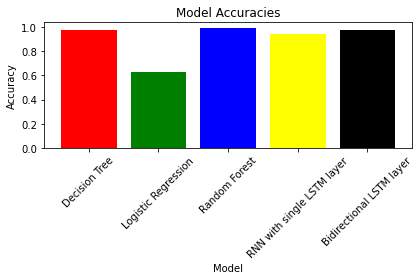

In [152]:
models = ['Decision Tree', 'Logistic Regression', 'Random Forest', 'RNN with single LSTM layer', 'Bidirectional LSTM layer']
accuracies = [0.98, 0.63, 0.99, 0.94, 0.98]

# Plot the accuracies
plt.bar(models, accuracies, color=['red', 'green', 'blue', 'yellow', 'black'])

# Set the title and axis labels
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()




Confusion Matrix:
[[962   3]
 [ 10 551]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       965
           1       0.99      0.98      0.99       561

    accuracy                           0.99      1526
   macro avg       0.99      0.99      0.99      1526
weighted avg       0.99      0.99      0.99      1526

ROC Curve:


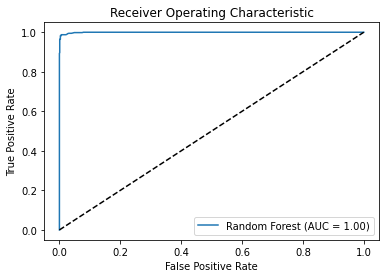

In [156]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Calculate and display the confusion matrix
cm = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:")
print(cm)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, rf_pred))

# Calculate and display the ROC curve and AUC score
probabilities = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
auc = roc_auc_score(y_test, probabilities)

print("ROC Curve:")
# Plot ROC curve
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


